In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [9]:
# checking for null values or na or nan
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
# checking the duplicate values
df.duplicated().sum()

np.int64(0)

In [11]:
# checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# checking the number of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
# to check the statistics of data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
print(df['gender'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [18]:
# defining numerical and categorical feature
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [23]:
print(f' total count for numerical feature: {len(numerical_feature)}. \n-> {numerical_feature}')
print(f' total count for categorical feature: {len(categorical_feature)}. \n-> {categorical_feature}')


 total count for numerical feature: 3. 
-> ['math_score', 'reading_score', 'writing_score']
 total count for categorical feature: 5. 
-> ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [25]:
# adding cols for total score and average
df['total_score'] = df['math_score']+ df['reading_score']+ df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

In [33]:
print(reading_full)
print(writing_full)
print(math_full)

17
14
7


In [34]:
reading_less_then_20 = df[df['reading_score'] <=20]['average'].count()
writing_less_then_20 = df[df['writing_score'] <=20]['average'].count()
math_less_then_20 = df[df['math_score'] <=20]['average'].count()

In [35]:
print(reading_less_then_20)
print(writing_less_then_20)
print(math_less_then_20)

1
3
4


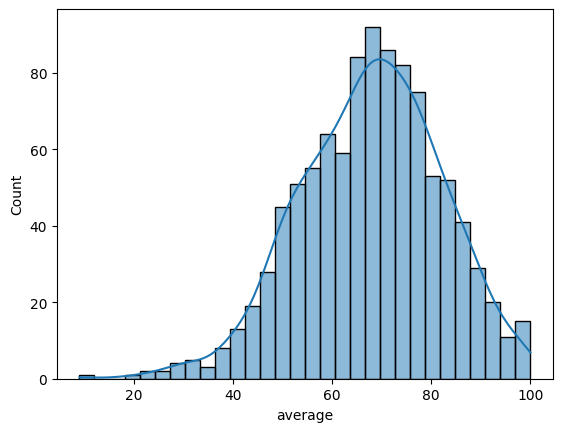

In [36]:
sns.histplot(data=df, x='average', bins= 30, kde= True)
plt.show()

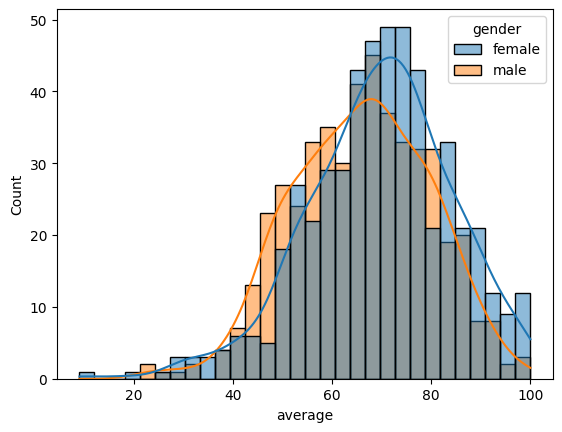

In [39]:
sns.histplot(data=df, x='average', bins= 30, kde= True, hue='gender', color='g')
plt.show()

<Axes: xlabel='total_score', ylabel='Count'>

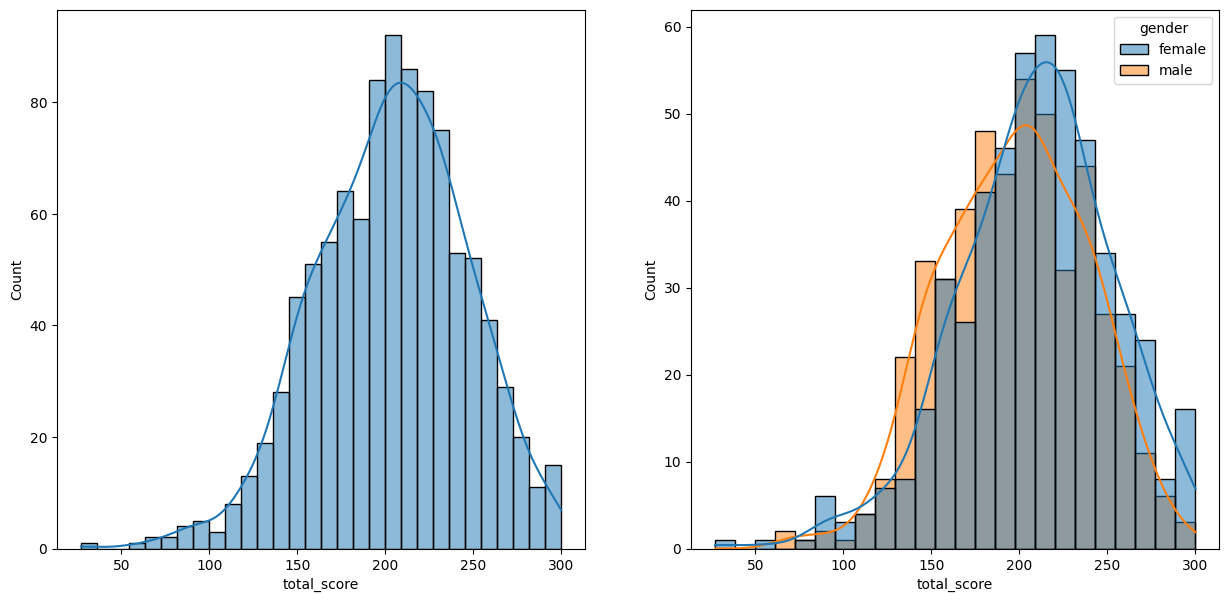

In [42]:
fig, axs = plt.subplots(1,2, figsize= (15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins= 30, kde= True)
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde= True, hue='gender', color='g')

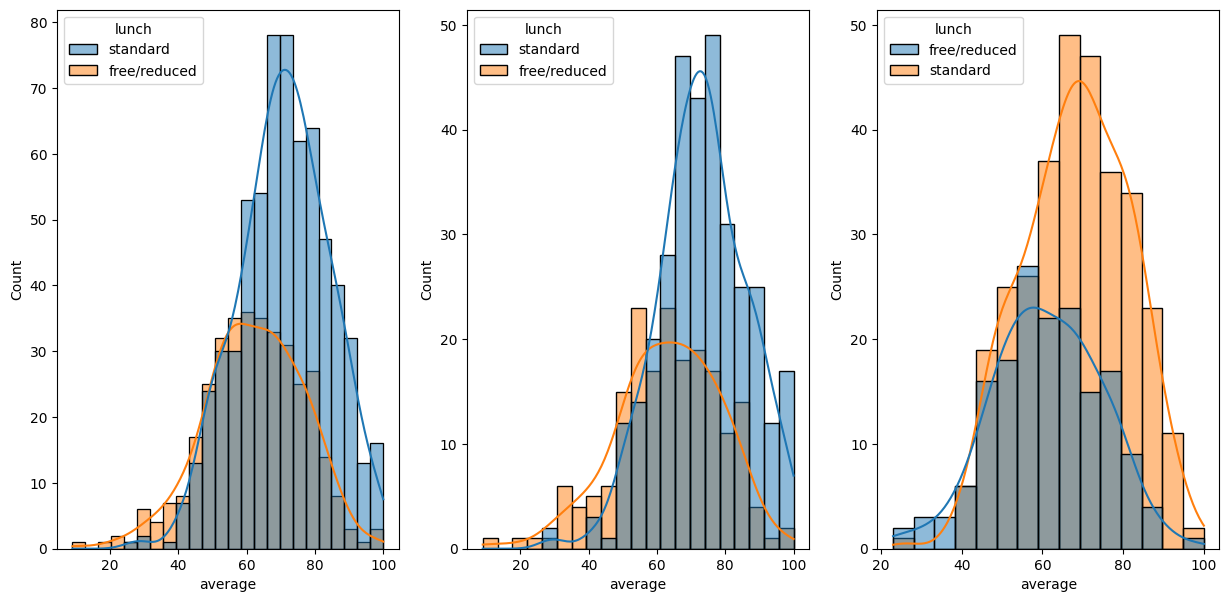

In [46]:
fig, axs = plt.subplots(1,3, figsize= (15, 7))
plt.subplot(131)
sns.histplot(data=df, x='average', kde= True, hue='lunch', color='g')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x = 'average', kde= True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x = 'average', kde= True, hue='lunch')
plt.show()